将数据记录在数据表时，特别是数据归类比较复杂的情况， 比如年级-班级-学生信息这种层级的记录，我们很可能要使用到合并单元格。 我们把这种模式叫做 Multi-Indexing 多索引。
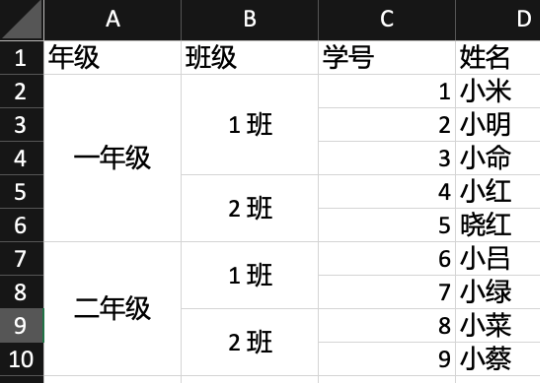

多索引在表格展示的时候，对数据规范化非常有利，所以如果你需要用表格来观察数据，是可以用这种形式来组织数据的。 但是如果你要做机器学习或频繁的数据加工时，我肯定不喜欢这样的数据组成方式，因为会让加工难度变高，成本变高。 所以你也可以想想，自己什么时候需要 Multi-Indexing.

### 构建Row多索引
假如我们有这样一组学生的名字数据，想要对它进行多索引分配。

In [1]:
import pandas as pd

s = pd.Series(
  ["小米", "小明",      # 一年一班
   "小命", "小勉",      # 一年二班
   "小牛", "小鸟",      # 二年一班
   "小南", "小妮"       # 二年二班
   ], name="name")
s

0    小米
1    小明
2    小命
3    小勉
4    小牛
5    小鸟
6    小南
7    小妮
Name: name, dtype: object

有些是 一年级 的，有些是 二年级 的。而且还分到的不同年级的不同班。 所以我们要给他们分配两个索引，年级，班级，班级在年级下面。

In [2]:
tuples = [
  # 年级，班级
  ("one", "1"),
  ("one", "1"),
  ("one", "2"),  ("one", "2"),
  ("two", "1"),
  ("two", "1"),
  ("two", "2"),
  ("two", "2"),
]
index = pd.MultiIndex.from_tuples(
  tuples, names=["grade", "class"])
index

MultiIndex([('one', '1'),
            ('one', '1'),
            ('one', '2'),
            ('one', '2'),
            ('two', '1'),
            ('two', '1'),
            ('two', '2'),
            ('two', '2')],
           names=['grade', 'class'])

有了这些索引，我们就能在刚刚构建 Series 的基础上，把 Multi-Index 给加上去了。

In [3]:
s = pd.Series(
    ["小米", "小明",      # 一年一班
     "小命", "小勉",      # 一年二班
     "小牛", "小鸟",      # 二年一班
     "小南", "小妮"       # 二年二班
     ], 
    name="name", #值对应的列名
    index=index)
s

grade  class
one    1        小米
       1        小明
       2        小命
       2        小勉
two    1        小牛
       1        小鸟
       2        小南
       2        小妮
Name: name, dtype: object

如果你想获取刚刚构建的 Series 索引，可以直接调用 s.index 来看看。

In [4]:
s.index

MultiIndex([('one', '1'),
            ('one', '1'),
            ('one', '2'),
            ('one', '2'),
            ('two', '1'),
            ('two', '1'),
            ('two', '2'),
            ('two', '2')],
           names=['grade', 'class'])

其实上面构建索引的方式还略微有点复杂，在年级班级的情况下，我们可以分级来构建索引，第一层级是年级，下面层级是每个学生所在的班级。

In [5]:
iterables = [
  ["one", "two"],  # 年级
  ["1", "1", "2", "2"]  # 每个学生所在班级
]

index2 = pd.MultiIndex.from_product(
  iterables, names=["grade", "class"]) #多重索引的列名
index2

MultiIndex([('one', '1'),
            ('one', '1'),
            ('one', '2'),
            ('one', '2'),
            ('two', '1'),
            ('two', '1'),
            ('two', '2'),
            ('two', '2')],
           names=['grade', 'class'])

这样构建的 index2 和上面刚刚构建的 index 数值上是一模一样的。

In [6]:
s2 = pd.Series(
    ["小米", "小明",      # 一年一班
     "小命", "小勉",      # 一年二班
     "小牛", "小鸟",      # 二年一班
     "小南", "小妮"       # 二年二班
     ], 
    name="name",
    index=index2)
s2

grade  class
one    1        小米
       1        小明
       2        小命
       2        小勉
two    1        小牛
       1        小鸟
       2        小南
       2        小妮
Name: name, dtype: object

欧，有时候你都不是用 Python 列表或者是元组来保存这些索引数据，你的索引数据也维护在一张 DataFrame 中。还别说，考虑一些业务逻辑的话， 还真有分开用不用表来维护的。

In [7]:
df = pd.DataFrame(
    [
    # 年级，班级
    ("one", "1"),
    ("one", "1"),
    ("one", "2"),
    ("one", "2"),
    ("two", "1"),
    ("two", "1"),
    ("two", "2"),
    ("two", "2"),
    ],
    columns=["grade", "class"]
)

index3 = pd.MultiIndex.from_frame(df)
index3

MultiIndex([('one', '1'),
            ('one', '1'),
            ('one', '2'),
            ('one', '2'),
            ('two', '1'),
            ('two', '1'),
            ('two', '2'),
            ('two', '2')],
           names=['grade', 'class'])

再来看看拼接起来是不是一样的？

In [8]:
s3 = pd.Series(
    ["小米", "小明",      # 一年一班
     "小命", "小勉",      # 一年二班
     "小牛", "小鸟",      # 二年一班
     "小南", "小妮"       # 二年二班
     ], 
    name="name",
    index=index3)
s3

grade  class
one    1        小米
       1        小明
       2        小命
       2        小勉
two    1        小牛
       1        小鸟
       2        小南
       2        小妮
Name: name, dtype: object

### 构建DataFrame多索引
刚刚做的都是 Series 的 Multi-Index 构建，我们再来举一个 DataFrame 的例子。这个表记录了学生的学号和姓名。

In [9]:
df1 = pd.DataFrame(
    {"id": [11,12,13,14,15,16,17,18],
    "name": 
     ["小米", "小明",      # 一年一班
     "小命", "小勉",      # 一年二班
     "小牛", "小鸟",      # 二年一班
     "小南", "小妮"       # 二年二班
    ]},
    index=index)
df1

id name
grade class         
one   1      11   小米
      1      12   小明
      2      13   小命
      2      14   小勉
two   1      15   小牛
      1      16   小鸟
      2      17   小南
      2      18   小妮

### 构建Column多索引
如果能构建 Row 的多索引，当然可以对 Column 做多索引配置。 假设我还是用上一个例子，只是把他们的行列对调一下。

In [10]:
df2 = pd.DataFrame(
    [[11,12,13,14,15,16,17,18],
     ["小米", "小明",      # 一年一班
     "小命", "小勉",      # 一年二班
     "小牛", "小鸟",      # 二年一班
     "小南", "小妮"       # 二年二班
    ]],
    index=["id", "name"])
df2

,0,1,2,3,4,5,6,7
id,11,12,13,14,15,16,17,18
name,小米,小明,小命,小勉,小牛,小鸟,小南,小妮


给它加上 Row 的 index，就相当于把原本的 Multi index 加到 columns 参数里。

In [11]:
df2 = pd.DataFrame(
    [[11,12,13,14,15,16,17,18],
     ["小米", "小明",      # 一年一班
     "小命", "小勉",      # 一年二班
     "小牛", "小鸟",      # 二年一班
     "小南", "小妮"       # 二年二班
    ]],
    index=["id", "name"],
    columns=index,  # 多索引加这
)
df2

grade one             two            
class   1   1   2   2   1   1   2   2
id     11  12  13  14  15  16  17  18
name   小米  小明  小命  小勉  小牛  小鸟  小南  小妮

### 选择数据
说了这么多构建多索引的方法，想必如果要你生成一张表保存下来，你已经没问题了。 但如果是要拿到一张多索引的表，要把里面的数据拿出来再加工呢？

这就需要我们会使用 pandas 的方法读多索引表了。 其实也不难，和正常读取选择数据非常像。

假设我们用的是下面这组数据

In [17]:
print(index)
df3 = pd.DataFrame(
    [[11,12,13,14,15,16,17,18], #没有指定key，所以按列排列
     ["小米", "小明",      # 一年一班
     "小命", "小勉",      # 一年二班
     "小牛", "小鸟",      # 二年一班
     "小南", "小妮"       # 二年二班
    ]],
    index=["id", "name"], #指定行的索引
    columns=index,  # 列的多索引加这。注意和上面的index不是同一个变量
)
df3

MultiIndex([('one', '1'),
            ('one', '1'),
            ('one', '2'),
            ('one', '2'),
            ('two', '1'),
            ('two', '1'),
            ('two', '2'),
            ('two', '2')],
           names=['grade', 'class'])


grade one             two            
class   1   1   2   2   1   1   2   2
id     11  12  13  14  15  16  17  18
name   小米  小明  小命  小勉  小牛  小鸟  小南  小妮

选取一年级的所有学生

In [13]:
df3["one"]

class,1,1,2,2
id,11,12,13,14
name,小米,小明,小命,小勉


再往下一级，选取一年级 1 班的所有学生

In [14]:
df3["one"]["1"]

class,1,1
id,11,12
name,小米,小明


那如果是在 Row 上多索引呢？我们还是可以像以前选取数据那样， 使用 .loc[] 来所筛选。

In [18]:
df4 = pd.DataFrame(
    {"id": [11,12,13,14,15,16,17,18], #指定了key，所以按行排列
    "name": 
     ["小米", "小明",      # 一年一班
     "小命", "小勉",      # 一年二班
     "小牛", "小鸟",      # 二年一班
     "小南", "小妮"       # 二年二班
    ]},
    index=index) #指定行的多索引。注意两个index不是一样的含义
df4

id name
grade class         
one   1      11   小米
      1      12   小明
      2      13   小命
      2      14   小勉
two   1      15   小牛
      1      16   小鸟
      2      17   小南
      2      18   小妮

下面就是用 .loc[] 来所筛选。

In [20]:
df4.loc["one"].loc["2"]

,id,name
class,,
2,13,小命
2,14,小勉


### 总结
到此，我们发现，数据表除了单 Column 和 单 Row 的索引方式，还可以在 Column 和 Row 上组建多层级的索引模式。 而且也不会影响我们日常从这种多索引的表格中获取数据。